<a target="_blank" href="https://colab.research.google.com/github/socrates77/snn-tre/blob/main/notebooks/Leaky-Integrate-and-Fire.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Preso in considerazione il modello Leaky Integrate con la seguente equazione differenziale

$$
\begin{equation*}
    {\tau}{\frac{{\mathrm{d}}V_{mem}(t)}{{\mathrm{d}}t}}=-V_{mem}(t)+RI_{syn}(t)
\end{equation*}
$$

Prendendo ad esempio valori tipici per i parametri $R$ e $C$ 
- $R=50M{\Omega}$
- $C=100pF$ 

otteniamo $\tau=5ms$.

Aggiungiamo alla implementazione anche la funzionalità Fire generando un vettore degli spike generati
dal nostro modello

In [49]:
import numpy as np
import matplotlib.pyplot as plt 
import snntorch.spikeplot as splt

def lif_neuron(v, time_step=1e-3, v_th=35e-3, I=0, R=5e7, C=1e-10):
  '''
  Implementazione del modello Leaky Integrate and Fire in python.
  '''
  tau=R*C
  spk = (v>v_th)
  # Sottraggo la tensione di soglia quando ho un spike
  v = v + (time_step/tau)*(-v + I*R) - (spk*v_th) 
  return v, spk

def v_mem_plot(time_vector, v_mem, filename='figure.eps', format='eps', title=''):
  # Creare la figura
  fig, ax = plt.subplots(figsize=(8,6)) # crea la figura e gli assi
  ax.plot(time_vector, v_mem) # disegna il grafico della tensione ai capi del condensatore
  ax.set_xlabel('Tempo') # aggiungi l'etichetta all'asse x
  ax.set_ylabel('Potenziale di membrana') # aggiungi l'etichetta all'asse y
  ax.set_title(title) # aggiungi il titolo alla figura

  # Salvare la figura in formato EPS
  fig.savefig(filename, format=format)

  # mostra
  plt.show()


def spk_plot(time_vector, spk_rec, filename='figure.eps', format='eps', title=''):
  # Creare la figura
  spike_record = [1 if element == 1 else None for element in spk_rec]
  fig, ax = plt.subplots(figsize=(8,2)) # crea la figura e gli assi
  # ax.bar(time_vector, spike_record, color=['k'])
  ax.scatter(time_vector, spike_record, marker='|', color=['k'])
  ax.set_yticks([])
  ax.set_xlim((-2, 27))
  ax.set_xlabel('Tempo') # aggiungi l'etichetta all'asse x
  ax.set_ylabel('Spikes') # aggiungi l'etichetta all'asse y
  ax.set_title(title) # aggiungi il titolo alla figura

  # Salvare la figura in formato EPS
  fig.savefig(filename, format=format)

  # mostra
  plt.show()

def v_mem_spike_plot(time_vector, v_mem, spk_rec, I=[], filename='figure.eps', format='eps', title=''):
  # Creare la figura
  spike_record = [1 if element == 1 else None for element in spk_rec]
  fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), height_ratios=[10, 1]) # crea la figura e gli assi
  
  if ( len(I) != 0 and len(I) == len(v_mem) ):
    axs_1 = axs[0].twinx()
    axs[0].plot(time_vector, v_mem, scaley=True) # disegna il grafico della tensione ai capi del condensatore
    axs_1.set_ylabel('$I_{syn}$', color='r')
    axs_1.plot(time_vector, I, 'r-', scaley=True)
  else:
    axs[0].plot(time_vector, v_mem) # disegna il grafico della tensione ai capi del condensatore

  axs[0].set_xlim((-2, 27))
  axs[0].set_xlabel('Tempo') # aggiungi l'etichetta all'asse x
  axs[0].set_ylabel('Potenziale di membrana') # aggiungi l'etichetta all'asse y

  axs[1].scatter(time_vector, spike_record, marker='|', color=['k'])
  axs[1].set_yticks([])
  axs[1].set_xlim((-2, 27))
  axs[1].set_xlabel('Tempo') # aggiungi l'etichetta all'asse x
  axs[1].set_ylabel('Spikes') # aggiungi l'etichetta all'asse y

  # Salvare la figura in formato EPS
  fig.savefig(filename, format=format)

  # mostra
  plt.show()

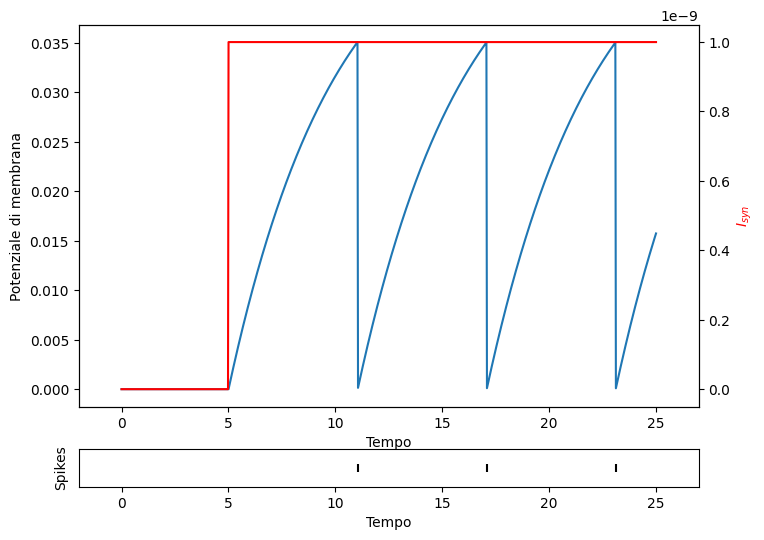

In [50]:
time_step=1e-3*25e-3 # Delta t del metodo di Eulero
time_vector = np.linspace(0, 25 + time_step, 1000)
I_syn = np.zeros_like(time_vector)
for i in range(200, len(time_vector)):
  I_syn[i] = 1e-9 # $1nA$

# v_init = 45e-3
v_init = 0
prev = v_init
spk = 0
I = 0
v_mem = np.zeros_like(time_vector)
spk_rec = np.zeros_like(time_vector)

for i in range(0, len(time_vector)):
  v_mem[i] = prev
  spk_rec[i] = spk
  I=I_syn[i]
  prev, spk = lif_neuron(prev, time_step, I=I)

# v_mem_plot(time_vector, v_mem)

# spk_plot(time_vector, spk_rec)

v_mem_spike_plot(time_vector, v_mem, spk_rec, I=I_syn)

Dati $I_{syn}(t)\ne0$ e $V_{mem}(0)=0V$ possiamo mostrare il comportamento Integrate del modello
Leaky Integrate and Fire.

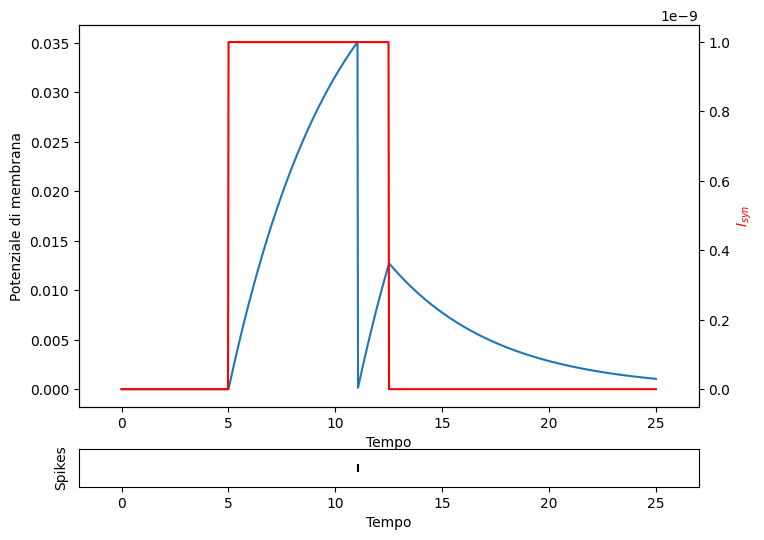

In [51]:
time_step=1e-3*25e-3 # Delta t del metodo di Eulero
time_vector = np.linspace(0, 25 + time_step, 1000)
I_syn = np.zeros_like(time_vector)
for i in range(200, 500): # len(time_vector)):
  I_syn[i] = 1e-9 # 1nA
v_init = 0
I=0
prev = v_init
spk_rec = np.zeros_like(time_vector)
spk = 0
v_mem = np.zeros_like(time_vector)

for i in range(0, len(time_vector)):
  I = I_syn[i]
  v_mem[i] = prev
  spk_rec[i] = spk
  prev, spk = lif_neuron(prev, time_step, I=I)

# v_mem_plot(time_vector, v_mem, filename='potenziale-di-membrana-comportamento-leaky-integrate-and-fire.eps')
# spk_plot(time_vector, spk_rec, filename='spikes-comportamento-leaky-integrate-and-fire.eps')
v_mem_spike_plot(time_vector, v_mem, spk_rec, I=I_syn, filename='curva-del-potenziale-di-membrana-e-spike.eps')